In [72]:
from Module.F17122018ML import F2020ML
import numpy as np
import pandas as pd

In [73]:
loc_dataframe = r'Data/Data Excel'
loc_datasave = r'Data/Data Excel'
load_Mdl = ix_model_load('Data/Data Model/L6n7_SVRnoNDVI_rbf.pkl')

In [74]:
"""Load Dataframe"""
loadDF = pd.read_excel(loc_dataframe + '/Frci_Line_6_BALANCE.xlsx')
loadDF.head(4)

,Class,frci5m,Band_2,Band_3,Band_4,Band_5
0,1,0.061834,0.110354,0.097893,0.086119,0.193996
1,1,0.000000,0.110728,0.102812,0.085787,0.059166
2,1,0.000000,0.126537,0.121310,0.120473,0.175330
3,1,0.000000,0.113784,0.097196,0.100245,0.116082


In [75]:
select_col = ['Band_2', 'Band_3', 'Band_4', 'Band_5']
select_row = 'frci5m'
dfx = pd.DataFrame(loadDF, columns=select_col)
dfy = np.asarray(loadDF[select_row])

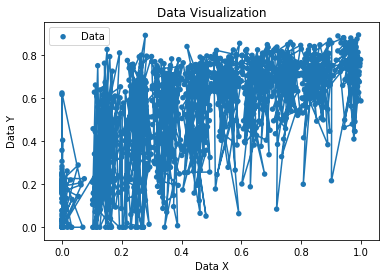

RMSE: 0.22277258466534397 ... R2: 0.44380985084173974


In [76]:
dfy_pred = load_Mdl.predict(dfx)
dfy_pred[dfy_pred < 0] = 0.00
dfy_pred[dfy_pred > 1] = 1.00
Model_RMSE = F2020ML.F2020_RMSE(dfy, dfy_pred)
Model_R2 = F2020ML.F2020_RSQRT(dfy, dfy_pred)
F2020ML.plot_data(dfy_pred, dfy)
print("RMSE:", Model_RMSE, "...", "R2:", Model_R2)

In [77]:
"""Saved Prediction Model to New Data Frame"""
df1 = pd.DataFrame({"Aktual": dfy})
df2 = pd.DataFrame({"Prediksi": dfy_pred})
# df3 = pd.DataFrame({"Prediksi": dfy_pred_RFR})
df_model = pd.concat([df1, df2], axis=1)
# df_model_RFR = pd.concat((df1, df3), axis=1)
df_model.to_excel(loc_datasave + "/SVR_RBF_Line_6_BALANCE_noNDVI.xlsx")